# その他の回帰手法

<div style="text-align: right;">
    <a href="other_ML_methods.ipynb">このページのオリジナルのipynbファイル</a>
</div>


## ニューラルネット回帰

一つの説明変数、一つの目的変数の非線形フィッティングにニューラルネット回帰を使うことはあまりないだろうが、機械学習の手法を回帰に使う事例として、これまで取り上げてきたデータ例をもとに試してみよう。

（カーネル法をいったん忘れて）基底関数の線形結合で目的変数を表す：
$$
 y = \sum_{j=1}^D w_j \phi_j (\boldsymbol{x}) \tag{1}
$$

これまで、訓練（トレーニング）データから機械学習の幾つかの方法を使って、係数$\{w_j\}$を決定することを行ってきた。

ニューラルネットの回帰手法は、これまでのフィッティングのイメージを引きついで説明すると以下のようになる。

- (1)式の出力を、複数個考える：
 $$
   a_i = \sum_{j=1}^D w_j^{(1)} \phi_j (\boldsymbol{x}) \tag{1}
 $$
 これが隠れユニット（神経細胞に相当）$i$への入力となる。

- 隠れユニットは、その入力値がある一定値を超えると発火すると考える。これがニューロンのイメージを引き継いだ考えである。

- 隠れユニットの$i$番目のノードの「発火」は重み$w_{ji}$をかけて次の層の$j$番目のノードに伝えられる。

単純のために隠れユニット層を１層とすると、

$$
 y = \sigma \left(
     \sum_{j=1}^M w_{j}^{(2)} h\left( \sum_{j=1}^D w_j^{(1)} \phi_j (\boldsymbol{x}) \right)
 \right)
$$
 
関数$\sigma$, $h$は、外から与えるものであり、階段関数、線形関数、ロジスティック関数などが用いられる。

PRMLからの図を引用する(図5.1) この図では出力は$K$個書かれているが、上の式では、出力（目的変数）一つだけにしたことに注意。


<img src="https://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/images/prmlfigs-png/Figure5.1.png" width="400"/>


学習（トレーニング）はデータを通じて、入力（説明変数）に対する出力が目的変数の観測地ともっともよく一致するようノード間の結合係数$w_{ij}^{k}$を決めていくことである。

人間の脳も、経験を通じてシナプス結合の強さが形成されていくと考えられており、それをまねたものである。神経細胞の興奮(発火)は、入力がある閾値を超えたときにおこると考えられており、それに類似する$h(x)$は階段関数であるが、回帰分析にはもっと滑らかな関数を用いることが多い。scikit-learnでは、線形あるいは負の値に対してはゼロとするrectified linear unit function $h(a_i) = {\rm max}(0, x)$、およびロジスティック関数用意されている。

どのように$w_{ij}^{k}$を決めるかがアルゴリズム上の本題であるが、ここでは省略する。



## scikit-learnのニューラルネット回帰 (Multi-layer Perceptron Regression)

scikit-learnにはニューラルネット回帰のモジュールMLPRegressorが提供されている。(MLPはMulti-layer Perceptronの略)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

今まで使ってきた$\sin$関数に乱数を加えたデータと多項式（べき）基底関数を使って、MLPregressorを試してみよう。

多項式近似の時と同様、入力として、ある変数$x$のべき乗$\{x^0, x, x^2, \cdots , x^D\}$を入力として、出力(1個)を説明変数$y$と比べるという訓練を行い、ニューロン結合係数$w_{ij}^{(k)}$を決定する。

(注)
- 基底関数をセットしなければならないところが、前回みたSVMと異なることに注意しよう。（SVMでは、基底関数の代わりにカーネルをセットする。通常、既定のガウシアンカーネル(rbf: radial basis function)を選べば問題ない。）

In [87]:
# データ作成用関数
import random
def make_data_by_sin_gaussian(x, randomness=0.2):
    # y=sin (x)を計算し、ガウス分布に従うノイズを加える
    y = np.sin(x)
    e = [random.gauss(0, randomness) for i in range(len(y))]
    # e = np.random.randn(len(x))*0.2
    y += e
    return y


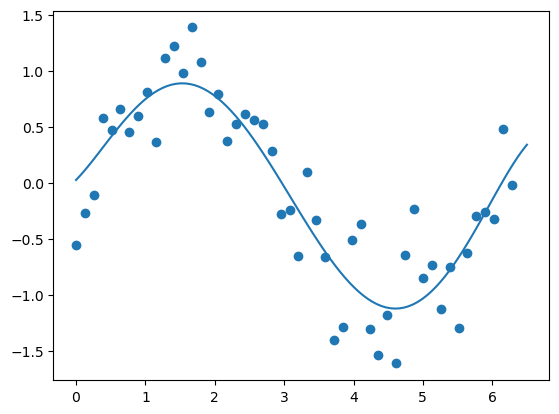

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

x_max = 6.5  # 予測の範囲の上限 (データは[0,2π]の範囲のみ)

# トレーニングデータ作成
n_tr = 50
x = np.linspace(0., np.pi*2., n_tr) # リスト 0から２πまでをn_tr等分した値を一次元配列
y = make_data_by_sin_gaussian(x, 0.3)

# 基底関数をM次の多項式とする
deg = 5
X = np.vander(x, deg+1) # 計画行列の作成
# X = x[:, np.newaxis]
   
'''
学習を行う (ここでの多項式近似では、1層で十分だが、
結合係数を決めるアルゴリズム(誤差逆伝播法)上、
ニューロン数(layer_size)を少なくとも2以上程度にする必要があるようだ。
   3以下ではかなり不安定
第1引数はhidden_layer_sizedをtupleで与える
既定値は(100,)
solverはlbfgs(quasi-Newton methods)にする。既定はadamだが、データ数が少ない場合はlbfgsがよい。
'''
mlp = MLPRegressor((5,3), activation="identity", solver="lbfgs", max_iter=2000)
mlp.fit(X,y)

# 予測
x_test = np.linspace(0, x_max, 100)
y_test = mlp.predict(np.vander(x_test, deg+1))
    
#プロット
plt.scatter(x, y)
plt.plot(x_test, y_test)

plt.show()


## ランダムフォレストによる回帰


訓練データをランダムサンプリングによりいくつかのサブデータを作り、説明変数と目的変数の関係を木構造に分類し、得られた木の平均をとる手法を、ランダムフォレスト(random forest)回帰という。https://ja.wikipedia.org/wiki/%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E3%83%95%E3%82%A9%E3%83%AC%E3%82%B9%E3%83%88


ランダムフォレストは、多数の説明変数がある場合の分類（例えば画像認識）に用いることが多いが、ここでは、上のデータ、つまり多項式のそれぞれの値を独立な説明変数としてランダムフォレスト回帰のモジュールを用いて評価してみよう。

変数の組$\{x^0, x, x^2, \cdots , x^D\}$を、目的変数を参照して、カテゴライズしようというのである。

パラメータはたくさんあるが、ここでは既定値での評価だけを示す。

Web検索を行うと、ボストンデータを用いた予測例などがたくさんあるので参考にしてほしい。

以下では、scikit-learnのRandomForestRegressorを用いてみる。

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


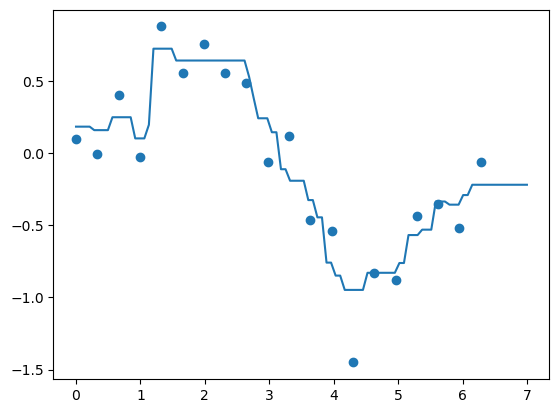

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR

x_max = 7.  # 予測の範囲の上限

# トレーニングデータ作成
n_tr = 20
x = np.linspace(0., np.pi*2., n_tr) # リスト 0から２πまでをn_tr等分した値を一次元配列
y = make_data_by_sin_gaussian(x, 0.3)

# 基底関数をM次の多項式とする
deg = 5
X = np.vander(x, deg+1) # 計画行列の作成

# 以上、データ作成###

# 学習 (説明変数X, 目的変数yは上で作ってあるものとする)
# 木の深さ max_depth (defaultでは最後の１個になるまで分類)
# ランダムに作成する木の数 n_estimators (default = 100)
rfr = RFR(max_depth=3, n_estimators=5)
#rfr = RFR()
rfr.fit(X,y)

# 予測
num_test = 100
x_test = np.linspace(0, x_max, num_test)
y_test = rfr.predict(np.vander(x_test, deg+1))
    
#プロット
plt.scatter(x, y)
plt.plot(x_test, y_test)

# sin(x)のプロット
#plt.plot(x_test, np.sin(x_test))

plt.show()


どちらの方法もハイパーパラメータがたくさんあり、利用する際にそれらを根拠をもって指定できる場合は、それでよいが、多くの場合、交差検定を行って、過学習にならないようにパラメータをセットする必要がある。そのことは忘れないでほしい。

sckit-learnでは、パラメータをしらみつぶしにさがすGridSearchCVなどが用意されている。

とはいえ、グリッドサーチにしてもその範囲は使う側がセットする必要がある。（それが多すぎるとランダムフォレストの場合などは猛烈に長い時間を要することになる。）

## Exercise 6

Exercise 5で試したのと同じノイズ付きsinc関数のデータについて、ニューラルネットとランダムフォレストによる回帰分析を行ってみよう。

## 参考：決定木の可視化

ランダムフォレストは、データから重複を許してランダムに抽出した複数のデータセットを用意して、それらを決定木により分類学習を行い、アンサンブル学習（多数決）により予測器をつくるものである。

その一つの決定木を図示するモジュールが作られている。

分類木を図示するツールとしてdtreevizが高機能である。単純な回帰問題で決定木を描くのはあまり意味がないが、紹介しておく。

Anacondaのパッケージには入ってないので、次の方法をとる。
- condaにリポジトリを指定してインストール
  - conda install -c conda-forge dtreeviz
  - conda install -c anaconda graphviz
- pythonのインストールツールpipを使う

上で述べたように、説明変数が一つという単純な例ではあまり意味がないが、分類がどのように行われるかを知る参考になるだろう。(findfontの警告がたくさん出るので、出力は割愛してある。)

In [ ]:
from sklearn import tree
import dtreeviz
import graphviz
estimators = rfr.estimators_
viz = dtreeviz.model(
    estimators[0],
    X, 
    y
) 
v = viz.view()
v
#v.save("images/dtreeviz_sample.svg")

## Using Random Forest for Boston data

Random Forestの有用性を示す事例として、線形重回帰の説明に使ったBostonデータの分析を示す。

Bostonデータの内容については、線形重回帰の説明ページ

https://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/PracDataSci/multiple_regression.html

を参照。


8回に説明するが、効果的な機械学習にするための前処理(標準化)、および推定の評価方法の使用例も含む。

### 学習用（トレーニング）データとテスト用データに分割

- データを一定の割合でランダムに２つに分割
- トレーニングデータをモデルに与えて学習させる
- 学習したモデルにテスト用データの説明変数を与え推定値を得る。
- 推定値とテストデータの目的変数を比較し、当てはまり度をチェックする。（どのくらい当たっていたかを答え合わせする。）

分割するメソッドは、**train_test_split**という名前で用意されている。

### 標準化

説明変数の中に絶対値が大きく異なる変数が含まれている場合、絶対値やばらつきが大きい変数の効果が強く表れてしまう。それを前もって是正する。

説明変数の平均値と標準偏差がそろうようにスケールすることを、データの標準化(Standardization)と呼ぶ。

scikit-learnでそれを行う関数は、**StandardScaler**である。


### 実例

以下のプログラムは、

https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/

で参照できるOxford Protain Informatics Groupによるものである。Bostonの住宅価格データを用いて、複数の説明変数がどのように住宅価格を説明できるかを線形重回帰とRandom Forestを用いて試している。

このページでは標準化を行う前と後で、主成分分析により説明変数の重要度の変化を見ているが、ここでは省略する。(主成分分析は、８週目で少し触れる。)

まず、データをpandasのDataFrameとして作成する。

注意：最新のScikit-learnバージョンでは、Bostonデータには倫理的問題があるので、将来のバージョンでは削除される予定という警告がでるようになった。そのことに留意して閲覧してほしい。

同様なプログラム例：https://hinomaruc.hatenablog.com/entry/2019/11/14/200857


In [108]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
# scikit-learnに付属するbostonデータの読み込み
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [110]:
'''
上のセルのように読み込むと、scikit-learn付属のデータにはethical problemがあるので、
データの意味を削除した次のようなデータを使うようにとのメッセージがでる。
よって、それを使うことにする。
'''
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
features = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
targets = raw_df.values[1::2, 2]
raw_df.head()

0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8

In [111]:
# データ数の確かめ
print(len(features))
print(len(targets))

506
506


In [112]:
# 訓練データとテストデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=0)

# データの正規化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# オリジナルのscikit-learnに含まれるBoston Dataを使う場合
#X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values,
#                              columns=X_train.columns.values)
#X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [114]:
# モデルの選択
# (1) 線形重回帰
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()

# (2)ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)

In [115]:
# 学習(トレーニング)
lm_model.fit(X_train_scaled, y_train)
rfr_model.fit(X_train_scaled, y_train)

#### 学習機械によるテストデータでの予測(推定)
lm_predicted_test = lm_model.predict(X_test_scaled)
rfr_predicted_test = rfr_model.predict(X_test_scaled)


# 各種評価指数の計算
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

# (1) 決定係数の算出
lm_test_score = r2_score(y_test, lm_predicted_test)
rfr_test_score = r2_score(y_test, rfr_predicted_test)

# (2) Spearman Correlationの算出
lm_spearman = spearmanr(y_test, lm_predicted_test)
rfr_spearman = spearmanr(y_test, rfr_predicted_test)

# (3) Pearson Correlationの算出
lm_pearson = pearsonr(y_test, lm_predicted_test)
rfr_pearson = pearsonr(y_test, rfr_predicted_test)

# 各種評価指標のプリント
print("Test data R-2 score: (Linear) %5.3f (Random Forest) %5.3f"
      % (lm_test_score, rfr_test_score))

print("Test data Spearman correlation: (Linear) %.3f (Random Forest) %.3f"
      % (lm_spearman[0], rfr_spearman[0]))

print("Test data Pearson correlation: (Linear) %.3f (Random Forest) %.3f"
      % (lm_pearson[0], rfr_pearson[0]))

Test data R-2 score: (Linear) 0.589 (Random Forest) 0.776
Test data Spearman correlation: (Linear) 0.805 (Random Forest) 0.845
Test data Pearson correlation: (Linear) 0.769 (Random Forest) 0.884


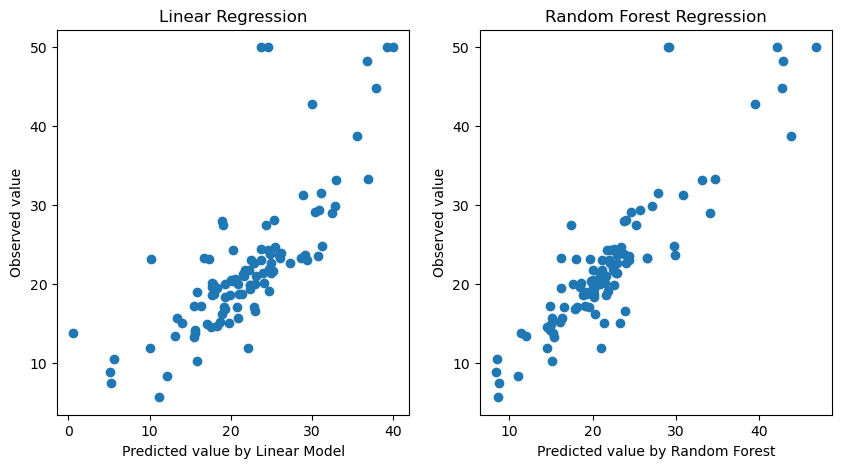

In [116]:
# 予測と観測値の散布図
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].scatter(lm_predicted_test, y_test)
axes[0].set_xlabel("Predicted value by Linear Model")
axes[0].set_ylabel("Observed value")
axes[0].set_title("Linear Regression")
axes[1].scatter(rfr_predicted_test, y_test)
axes[1].set_xlabel("Predicted value by Random Forest")
axes[1].set_ylabel("Observed value")
axes[1].set_title("Random Forest Regression")
plt.show()

上記では、引用したページと同じ木の数(n_estimators)を500にしているが、もっと少なくてもさほど違わないだろう。

以下にgraphvizによる図示プログラム例を示す。（巨大な木で、画像のダウンロードに時間がかかるので出力は削除した。）

In [ ]:
from sklearn import tree
from dtreeviz.trees import *
import graphviz
estimators = rf.estimators_
viz = dtreeviz(
    estimators[0],
    X_train, 
    y_train,
    target_name='price',
    feature_names=boston.feature_names,
    # class_names=[],
) 

viz


多数の大量な説明変数をもつデータの分類、回帰に対する決定木ベースの手法は、最近も研究が進んでいるようだ。
そのなかでもXGBoostなどが有名である。モジュールも存在するので興味ある人は試してみてほしい。

In [78]:
%%html
<link rel="stylesheet" type="text/css" href="common.css">

## Other Housing Datasets in sklearn

Bostonデータ以外の同種のサンプルデータをのぞいてみる。

<dl>
    <dt>"california_housing" in "datasets"</dt>
    <dd>Boston Dataと同様な分析ができそう。データ数が多く、featureの数がすくない。</dd>
    <dt>"housing_prices" in "openml"</dt>
    <dd> Iowa州のAmesのデータ。features項目が非常に多い。</dd>
</dl>

上のセルで試みたBostonデータの分析と同じことをCaliforniaデータに対して行ってみた結果を
https://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/PracDataSci/HousingDataStudy.html
に示す。（詳しい分析はしていない。）

In [74]:
# California Housing Data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [75]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
print(housing.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [77]:
housing.frame

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
1        2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
2        3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
3        4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
4        5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456.0        60.0       RL         62.0   7917.0   Pave  None      Reg   
1456  1457.0        20.0       RL         85.0  13175.0   Pave  None      Reg   
1457  1458.0        70.0       RL         66.0   9042.0   Pave  None      Reg   
1458  1459.0        20.0       RL         68.0   9717.0   Pave  None      Reg   
1459  1460.0        20.0       RL         75.0   9937.0   Pave  None      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...      0.0   None   None        None     0.0   
1            Lvl    AllPub  ...      0.0   None   None        None     0.0   
2            Lvl    AllPub  ...      0.0   None   None        None     0.0   
3            Lvl    AllPub  ...      0.0   None   None        None     0.0   
4            Lvl    AllPub  ...      0.0   None   None        None     0.0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...      0.0   None   None        None     0.0   
1456         Lvl    AllPub  ...      0.0   None  MnPrv        None     0.0   
1457         Lvl    AllPub  ...      0.0   None  GdPrv        Shed  2500.0   
1458         Lvl    AllPub  ...      0.0   None   None        None     0.0   
1459         Lvl    AllPub  ...      0.0   None   None        None     0.0   

     MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2.0  2008.0        WD         Normal   208500.0  
1       5.0  2007.0        WD         Normal   181500.0  
2       9.0  2008.0        WD         Normal   223500.0  
3       2.0  2006.0        WD        Abnorml   140000.0  
4      12.0  2008.0        WD         Normal   250000.0  
...     ...     ...       ...            ...        ...  
1455    8.0  2007.0        WD         Normal   175000.0  
1456    2.0  2010.0        WD         Normal   210000.0  
1457    5.0  2010.0        WD         Normal   266500.0  
1458    4.0  2010.0        WD         Normal   142125.0  
1459    6.0  2008.0        WD         Normal   147500.0  

[1460 rows x 81 columns]